# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math
from ratelimit import limits
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

list_lat_lngs = []
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        list_lat_lngs.append((lat_lng,city))
        
    

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
list_lat_lngs_city = []
for info in list_lat_lngs:
    #print(info)
    info = info[0] + (info[1],)
    list_lat_lngs_city.append(info)

In [4]:
def chunks(l, n):
    for i in range(0, len(l), n):
    # Create an index range for l of n items:
        yield l[i:i+n]

In [5]:
sample_set = {}
#sample_size = len(list(chunks(list_lat_lngs,50)))
for i , x in enumerate(list(chunks(list_lat_lngs_city,50))):
    sample_set["Set {0}".format(i+1)] = x

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#base_url = "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
weather_json_data = []
print('Begining Data Retreival')
print('---------------------------')
for item in sample_set:
    for i, x in enumerate(sample_set[item]):
        try:
            query_url = f"{base_url}lat={sample_set[item][i][0]}&lon={sample_set[item][i][1]}&appid={weather_api_key}"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            weather_json_data.append(weather_json)
            print(f"Processing Record {i+1} of {item} | {sample_set[item][i][2]}")
        except:
            print('City not found. Skipping...')
            
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Begining Data Retreival
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | garden city
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | abha
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | havre-saint-pierre
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | ewa beach
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | komsomolskiy
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | alotau
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | saldanha
Processing Record 23 of Set 1 | cape town
Processing Record 24 of S

In [22]:
sample_set = {}
for i , x in enumerate(list(chunks(cities,50))):
    sample_set["Set {0}".format(i+1)] = x

In [58]:
#make dictionary that comtains all sets os size between 1-50
sample_set = {}
for i , x in enumerate(list(chunks(cities,50))):
    sample_set["Set {0}".format(i+1)] = x
    
#set parametrs and url source
#base_url = "http://api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

weather_json_data = []

#Pull data from API in loop for all sets
print('Begining Data Retreival')
print('---------------------------')

for set_n in sample_set:
    time.sleep(30)
    for index, city in enumerate(sample_set[set_n]):
        query_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        if weather_json['cod'] == 200:
            weather_json_data.append(weather_json)
            print(f"Processing Record {index+1} of {set_n} | {city}")
        else:
            print('City not found. Skipping...')
            
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Begining Data Retreival
---------------------------
City not found. Skipping...
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | sangar
City not found. Skipping...
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | kula
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | aden
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | havoysund
Processing Record 15 of Set 1 | camacha
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | cairns
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | havre-saint-pierre
Processing Record 23 of Set 1 | airai
Processing Record 24 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:

df_dict = {}

data_points = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']

#create dictionary value for required data
for x in data_points:
    df_dict[x] = []
    
#loop through all datasets and pull required information for dataframe
for dataset in weather_json_data:
        df_dict['City'].append(dataset['name'])
        df_dict['Cloudiness'].append(dataset['clouds']['all'])
        df_dict['Country'].append(dataset['sys']['country'])
        df_dict['Date'].append(dataset['dt'])
        df_dict['Humidity'].append(dataset['main']['humidity'])
        df_dict['Lat'].append(dataset['coord']['lat'])
        df_dict['Lng'].append(dataset['coord']['lon'])
        df_dict['Max Temp'].append(dataset['main']['temp_max'])
        df_dict['Wind Speed'].append(dataset['wind']['speed'])

        
weather_df = pd.DataFrame(df_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,20,ZA,1584039926,94,-33.02,27.91,295.15,4.10
1,Punta Arenas,95,CL,1584039778,76,-53.15,-70.92,289.15,3.60
2,Sangar,100,RU,1584039926,89,63.92,127.47,248.25,4.80
3,Qaanaaq,0,GL,1584039927,47,77.48,-69.36,245.75,2.57
4,Yangi Marg`ilon,0,UZ,1584039927,61,40.43,71.72,282.15,2.10


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [98]:
#latest date of data
as_of_date = weather_df['Date'].max()
as_of_date = datetime.fromtimestamp(as_of_date)
as_of_date = as_of_date.strftime("%m/%d/%Y")

'03/12/2020'

#### Latitude vs. Temperature Plot

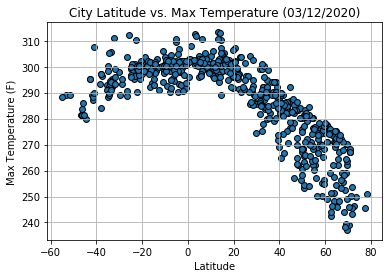

In [105]:
plot1 = weather_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, edgecolor='k', s =35)
plot1.set_xlabel('Latitude')
plot1.set_ylabel('Max Temperature (F)')
plot1.set_title(f"City Latitude vs. Max Temperature ({as_of_date})")
plt.show()

#### Latitude vs. Humidity Plot

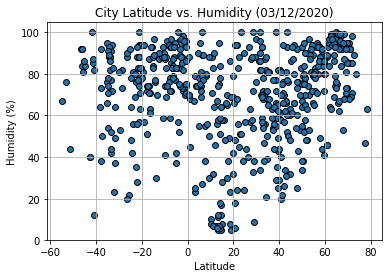

In [109]:
plot2 = weather_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, edgecolor='k', s =35)
plot2.set_xlabel('Latitude')
plot2.set_ylabel('Humidity (%)')
plot2.set_title(f"City Latitude vs. Humidity ({as_of_date})")
plt.show()

#### Latitude vs. Cloudiness Plot

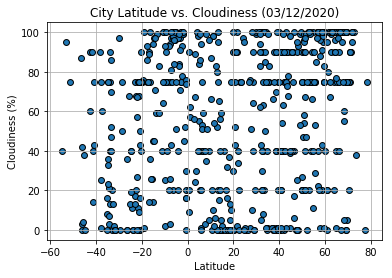

In [108]:
plot3 = weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, edgecolor='k', s =35)
plot3.set_xlabel('Latitude')
plot3.set_ylabel('Cloudiness (%)')
plot3.set_title(f"City Latitude vs. Cloudiness ({as_of_date})")
plt.show()

#### Latitude vs. Wind Speed Plot

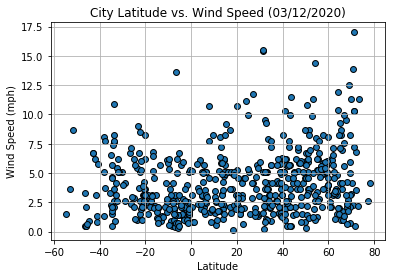

In [110]:
plot3 = weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, edgecolor='k', s =35)
plot3.set_xlabel('Latitude')
plot3.set_ylabel('Wind Speed (mph)')
plot3.set_title(f"City Latitude vs. Wind Speed ({as_of_date})")
plt.show()

## Linear Regression

In [129]:
# OPTIONAL: Create a function to create Linear Regression plots
def do_regression(x_values,y_values,xname, yname):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    print(f"The r-squared is: {rvalue}")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x=x_values, y=y_values)
    plt.xlabel(f"{xname}")
    plt.ylabel(f"{yname}")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+5,min(y_values)),fontsize=15,color="red")
    
    
    
    plt.show()


In [136]:
def do_regression2(df, x_values,y_values):
    
    df.plot(kind = 'scatter', x= x_axis , y = y_axis)
    x_values = df[x_axis]
    y_values = df[y_axis]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    print(f"The r-squared is: {rvalue}")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x=x_values, y=y_values)
    plt.xlabel(f"{xname}")
    plt.ylabel(f"{yname}")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+5,min(y_values)+5),fontsize=15,color="red")
    
    
    
    plt.show()


In [132]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df['Lat'] >= 0]
southern_df = weather_df.loc[weather_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8768758912620804


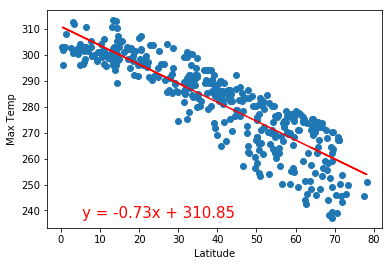

In [130]:
do_regression(northern_df['Lat'], northern_df['Max Temp'], 'Latitude', 'Max Temp')

In [ ]:
do_regression2(northern_df, x_values,y_values)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5345675654708687


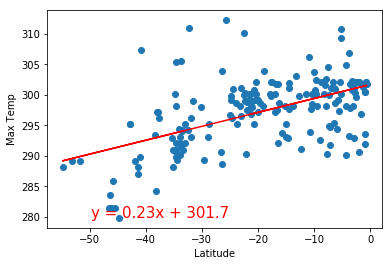

In [133]:
do_regression(southern_df['Lat'], southern_df['Max Temp'], 'Latitude', 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3930387672280596


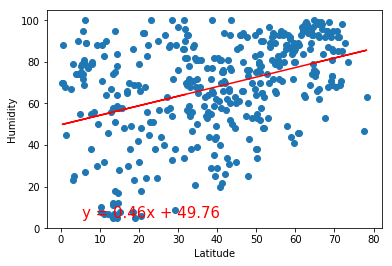

In [134]:
do_regression(northern_df['Lat'], northern_df['Humidity'], 'Latitude', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21031830343531996


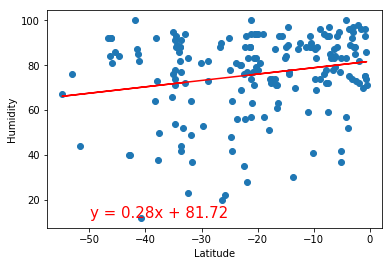

In [135]:
do_regression(southern_df['Lat'], southern_df['Humidity'], 'Latitude', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


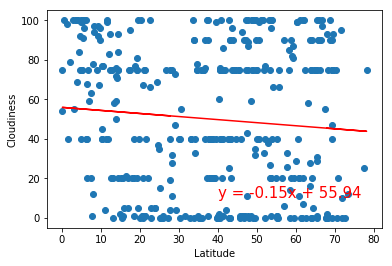

In [115]:
do_regression(northern_df['Lat'], northern_df['Cloudiness'], 'Latitude', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


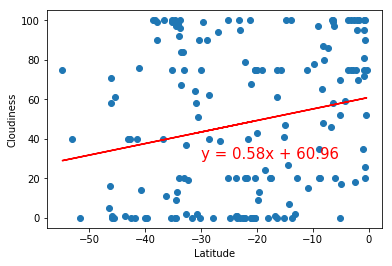

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


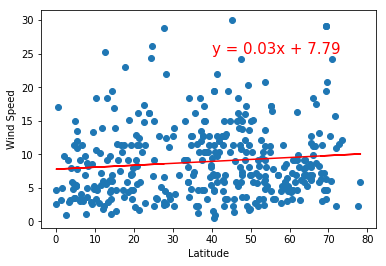

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


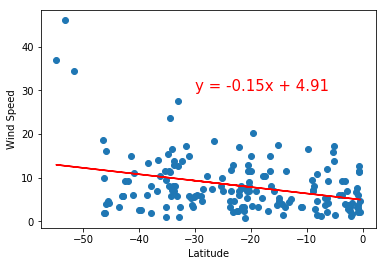